In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#! pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

Objective 1 - Clustering

Using the data from the train.csv file determine the best clustering approach able to classify this dataset

Using the data from the unique_m.csv file determine the best clustering approach able to classify this dataset

compare both approaches in computational performance and clustering quality (using intrinsic methods)

In [2]:
train = pd.read_csv('train.csv')
train = train.drop(train.columns[-1], axis=1)

unique = pd.read_csv('unique_m.csv')
unique = unique.drop(unique.columns[-1], axis=1)

In [3]:
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
unique = pd.DataFrame(scaler.fit_transform(unique), columns=unique.columns)

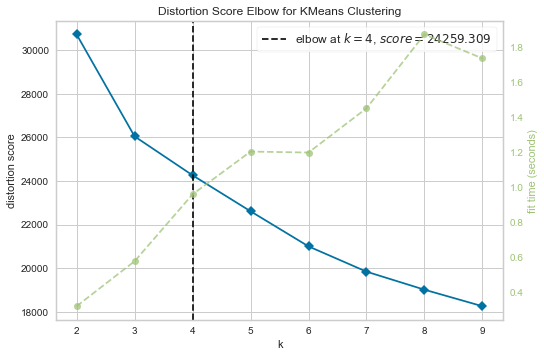

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
model1_train = KMeans(random_state=42) #k-means++

elb_visualizer = KElbowVisualizer(model1_train, k=(2,10))
elb_visualizer.fit(train)    
elb_visualizer.show()

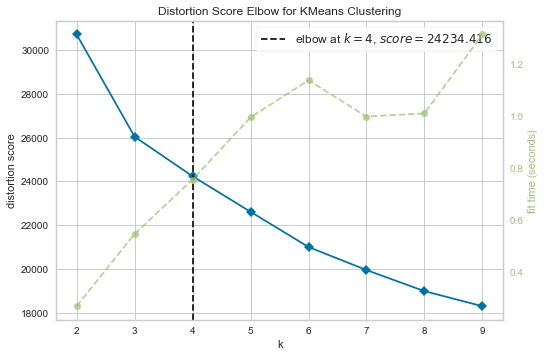

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
model2_train = KMeans(random_state=42, init = "random") #k-means

elb_visualizer = KElbowVisualizer(model2_train, k=(2,10))
elb_visualizer.fit(train)    
elb_visualizer.show()

The distortion score is computed by summing the squared distances from each point to its assigned center. When using this metric, the elbow plot seems to suggest that the 'train' dataset can be divided into 4 different clusters, for both k-means and k-means++. However, as this metric only takes the tightness of the cluster into account, we should also check the silhouette scores. These take the distances between points of one cluster and the nearest cluster center into account - higher silhouette scores mean that the clusters are not only tighter but also farther from each other.

In [40]:
for n in list(range(2,11)):
    model = KMeans(n_clusters = n, max_iter = 1000)
    model.fit(train)
    
    labels = model.labels_
    
    silhouette = silhouette_score(train, labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(n, silhouette))

For n_clusters = 2, the silhouette score is 0.40024590045383973
For n_clusters = 3, the silhouette score is 0.3483435501994057
For n_clusters = 4, the silhouette score is 0.3397988599302635
For n_clusters = 5, the silhouette score is 0.22922827041740504
For n_clusters = 6, the silhouette score is 0.22120354790697805
For n_clusters = 7, the silhouette score is 0.2343853383158676
For n_clusters = 8, the silhouette score is 0.23005267598373874
For n_clusters = 9, the silhouette score is 0.2228115828928103
For n_clusters = 10, the silhouette score is 0.23015506418315618


The silhouette scores for n_clusters = 2 and n_clusters = 3 are higher than for n_clusters = 4, with the first having the highest value. A value of 0.4 seems to indicate that the clusters are somewhat well-separated and that the data points within each cluster are similar to one another, but the separation between clusters could be a lot better.

In [47]:
def model_nclust(n, data, algo = "k-means++"):
    if algo == "k-means++":
        model = KMeans(n_clusters = n, random_state = 42)
    elif algo == "k-means":
        model = KMeans(n_clusters = n, random_state = 42, init = "random")

    sil_visualizer = SilhouetteVisualizer(model)
    sil_visualizer.fit(data)    
    sil_visualizer.show()

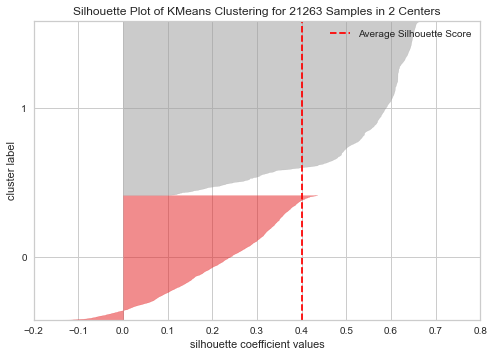

In [48]:
model_nclust(2, train)

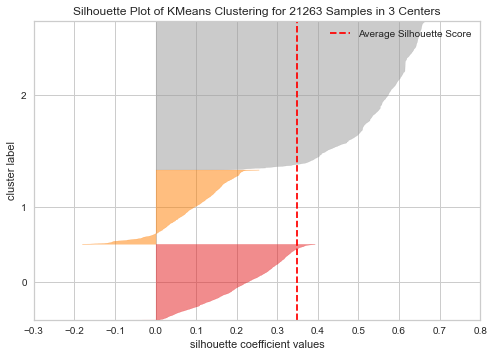

In [49]:
model_nclust(3, train)

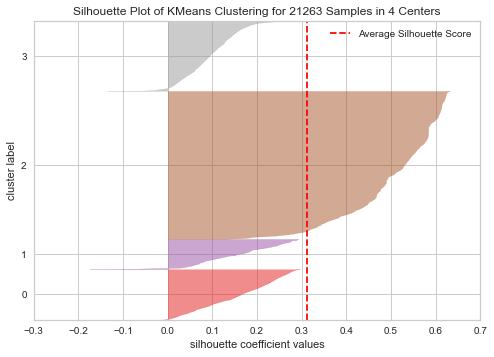

In [50]:
model_nclust(4, train)

When n = 3 and n = 4, the plots look quite bad, as there are clusters whose instances end to the left of the dashed line (i.e., these instances are much too close to other clusters). Even though the plot for n = 2 is better than the other ones, it still doesn't look so good, especially for cluster 0.

K-means doesn't seem to be a good approach for clustering these data.

C:\Users\dgonc\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\dgonc\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


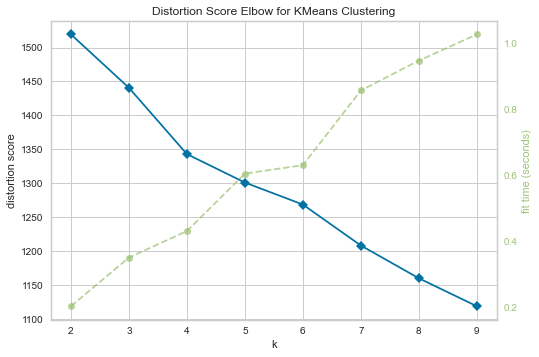

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
model1_unique = KMeans(random_state=42) #k-means++

elb_visualizer = KElbowVisualizer(model1_unique, k=(2,10))
elb_visualizer.fit(unique)    
elb_visualizer.show()

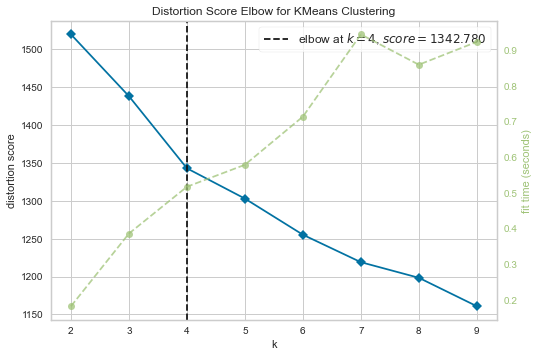

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
model2_unique = KMeans(random_state=42, init = "random") #k-means

elb_visualizer = KElbowVisualizer(model2_unique, k=(2,10))
elb_visualizer.fit(unique)    
elb_visualizer.show()

When using k-means++, no elbow point could be detected. As the error says, this could be due to bad clustering or no actual clusters being formed. However, when using k-means, there is an elbow point at k = 4.

Let's check the silhouette scores.

In [54]:
for n in list(range(2,11)):
    model = KMeans(n_clusters = n, max_iter = 1000, init = "random") #specifying k-means as opposed to k-means++
    model.fit(unique)
    
    labels = model.labels_
    
    silhouette = silhouette_score(unique, labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(n, silhouette))

For n_clusters = 2, the silhouette score is 0.3874188948641118
For n_clusters = 3, the silhouette score is 0.21718663610416927
For n_clusters = 4, the silhouette score is 0.20848544256677926
For n_clusters = 5, the silhouette score is 0.2182248236875994
For n_clusters = 6, the silhouette score is 0.1932851122449296
For n_clusters = 7, the silhouette score is 0.18682195646247468
For n_clusters = 8, the silhouette score is 0.2069110973780925
For n_clusters = 9, the silhouette score is 0.16782660047207482
For n_clusters = 10, the silhouette score is 0.17361366102244405


Again, the higher silhouette score is for n_clusters = 2. In this case, the difference between its value and the value for n_clusters = 4 is much larger.

Let's check the silhouette plot.

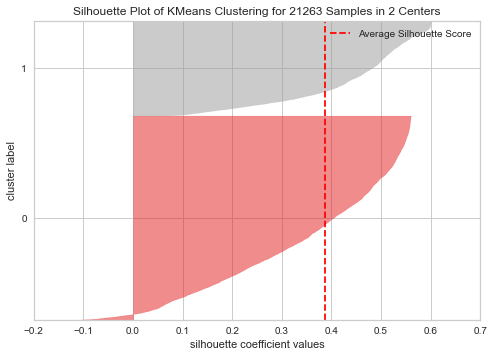

In [56]:
model_nclust(2, unique, "k-means")

This plot is much better than the one generated for the 'train' data when n = 2. It seems that k-means is a good approach for clustering the 'unique' data.

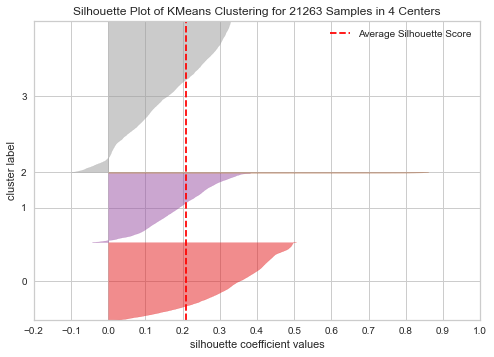

In [57]:
model_nclust(4, unique, "k-means")

Even when n = 4, as the elbow method suggested, the silhouette plot is rather good.